<a href="https://colab.research.google.com/github/acharyariku/PyTorch-Training/blob/main/PyTorch_Tutorial_Exercise01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
device = 'cpu'
if torch.cuda.is_available():
  device = 'cuda'

In [ ]:
weight = 0.3
bias = 0.9

X = torch.arange(0,100)
y = weight*X + bias

test_train_split = int(0.8 * len(X))

X_train,y_train,X_test,y_test = X[:test_train_split],y[:test_train_split],X[test_train_split:],y[test_train_split:]

X_train.to(device)
y_train.to(device)
X_test.to(device)
y_test.to(device)

tensor([24.9000, 25.2000, 25.5000, 25.8000, 26.1000, 26.4000, 26.7000, 27.0000,
        27.3000, 27.6000, 27.9000, 28.2000, 28.5000, 28.8000, 29.1000, 29.4000,
        29.7000, 30.0000, 30.3000, 30.6000])

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c='b',s=4,label="Training Data")
  plt.scatter(test_data,test_labels,c='g',s=4,label="Testing Data")
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size":10})


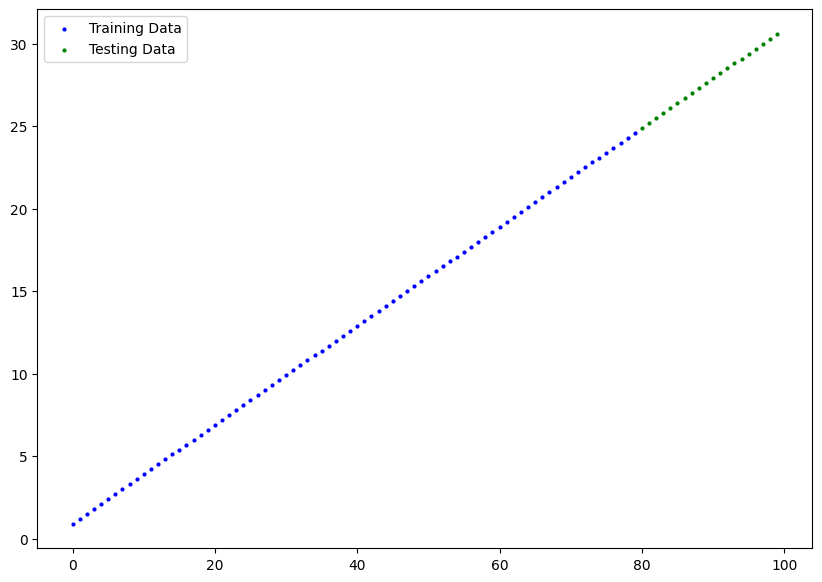

In [ ]:
plot_predictions()

In [ ]:
class myModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                dtype=torch.float),
                                requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,
                             dtype=torch.float),
                             requires_grad=True)
  def forward(self,X):
    return self.weights * X + self.bias

In [ ]:
model = myModel()
model.state_dict()
model.to(device)

myModel()

In [ ]:
loss = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [ ]:
epochs = 300

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model.train()

  y_pred = model(X_train)

  lossVal = loss(y_pred,y_train)

  optimizer.zero_grad()

  lossVal.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_pred = model(X_test)

    test_loss = loss(test_pred,y_test.type(torch.float))

    if epoch%20 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(lossVal.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {lossVal} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 2.066441774368286 | MAE Test Loss: 30.81156349182129 
Epoch: 20 | MAE Train Loss: 2.063941478729248 | MAE Test Loss: 30.814062118530273 
Epoch: 40 | MAE Train Loss: 2.0614418983459473 | MAE Test Loss: 30.81656265258789 
Epoch: 60 | MAE Train Loss: 2.0589423179626465 | MAE Test Loss: 30.81906509399414 
Epoch: 80 | MAE Train Loss: 2.0564422607421875 | MAE Test Loss: 30.821563720703125 
Epoch: 100 | MAE Train Loss: 2.0539422035217285 | MAE Test Loss: 30.82406234741211 
Epoch: 120 | MAE Train Loss: 2.0514426231384277 | MAE Test Loss: 30.82655906677246 
Epoch: 140 | MAE Train Loss: 2.048942804336548 | MAE Test Loss: 30.829059600830078 
Epoch: 160 | MAE Train Loss: 2.046443223953247 | MAE Test Loss: 30.831562042236328 
Epoch: 180 | MAE Train Loss: 2.043942928314209 | MAE Test Loss: 30.834060668945312 
Epoch: 200 | MAE Train Loss: 2.041443347930908 | MAE Test Loss: 30.836559295654297 
Epoch: 220 | MAE Train Loss: 2.0389437675476074 | MAE Test Loss: 30.83905982971191

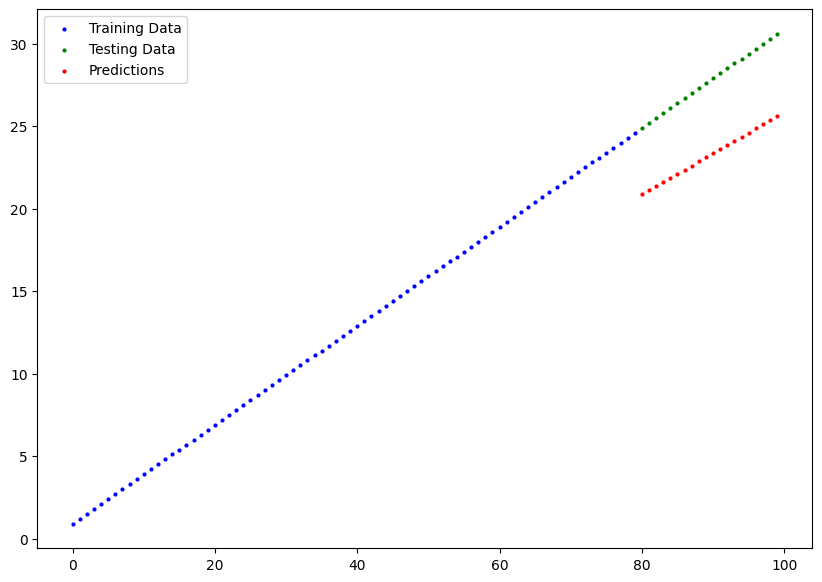

In [ ]:
plot_predictions(predictions=test_pred.cpu())

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
loaded_model = myModel()

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH,weights_only=True))

loaded_model.to(device)

print(f"Loaded model:\n{loaded_model}")
print(f"Model on device:\n{next(loaded_model.parameters()).device}")

Loaded model:
myModel()
Model on device:
cpu


In [ ]:
y_pred_loaded = loaded_model(X_test)

y_pred_loaded == test_pred

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])